# Climate Change and Impacts in Africa

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

You work for a Non-governmental organization tasked with reporting the state of climate change in Africa at the upcoming African Union Summit. The head of analytics has provided you with [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) which you will clean, combine and analyze to create a report on the state of climate change in Africa. You will also provide insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies). 

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **The dataset can be inspected directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Instructions

The head of analytics in your organization has specifically asked you to do the following:


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.


In [1]:
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import inspect

plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# we need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')




# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: So Africa
temperatures = pd.read_csv('temperatures.csv')

In [2]:
totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')

## Instruction 1: Clean and tidy the datasets

### Tasks

- Rename `C_group_IM24_sh` to `Region`, `Country_code_A3` to `Code`, and `ipcc_code_2006_for_standard_report_name` to `Industry` in the corresponding African datasets.
- Drop `IPCC_annex`, `ipcc_code_2006_for_standard_report`, and `Substance` from the corresponding datasets.
- Melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`. Drop rows where `CO2` is missing.
- Convert `Year` to `int` type.


In [3]:
ipcc_2006_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
42,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.2,Manufacturing Industries and Construction,CO2,bio,468.101210,468.101210,...,878.017490,876.424760,694.984348,628.393538,716.208742,745.933600,790.238440,796.965524,806.888450,835.471254
43,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.4,Residential and other sectors,CO2,bio,9803.605447,9803.605447,...,18457.831374,18758.674388,19052.717572,19338.111419,19616.705006,19909.315374,20177.076755,20441.554365,20904.334177,20904.334177
44,Non-Annex_I,Southern_Africa,AGO,Angola,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Non-Annex_I,Southern_Africa,AGO,Angola,3.C.1,Emissions from biomass burning,CO2,bio,1168.997514,1149.912236,...,2224.584701,3824.749751,3521.645794,3651.157894,4482.919263,4500.168653,4686.371296,4779.221426,4386.060462,4085.260834
46,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.a,Main Activity Electricity and Heat Production,CO2,fossil,137.584287,137.584287,...,2699.129471,3993.658132,5669.710708,6130.962446,4198.262959,4071.508850,4016.468964,4612.129507,4304.458056,4687.903324


In [4]:
ipcc_2006_africa = ipcc_2006_africa.rename(columns={"C_group_IM24_sh":'Region', "Country_code_A3":'Code', 'ipcc_code_2006_for_standard_report_name':'Industry'})
ipcc_2006_africa = ipcc_2006_africa.drop(columns=["IPCC_annex", 'ipcc_code_2006_for_standard_report','Substance'], axis='columns')

#Reshaping ipcc_2006_africa using pd.wide_to_long
ipcc_2006_africa = pd.wide_to_long(ipcc_2006_africa, stubnames=['Y'], i=['Region', 'Code', 'Industry', 'Name', 'fossil_bio'], j='Year', sep='_')
ipcc_2006_africa.reset_index(inplace=True)
ipcc_2006_africa = ipcc_2006_africa.rename(columns={'Y':'CO2'})
ipcc_2006_africa.head()

,Region,Code,Industry,Name,fossil_bio,Year,CO2
0,Southern_Africa,AGO,Manufacturing Industries and Construction,Angola,bio,1970,468.10121
1,Southern_Africa,AGO,Manufacturing Industries and Construction,Angola,bio,1971,468.10121
2,Southern_Africa,AGO,Manufacturing Industries and Construction,Angola,bio,1972,469.30115
3,Southern_Africa,AGO,Manufacturing Industries and Construction,Angola,bio,1973,471.10147
4,Southern_Africa,AGO,Manufacturing Industries and Construction,Angola,bio,1974,473.50135


In [5]:
#Setting dtype for 'Year' column and dropping columns with null CO2 values
ipcc_2006_africa["Year"] = ipcc_2006_africa["Year"].astype('int')
ipcc_2006_africa = ipcc_2006_africa.dropna(subset='CO2')

In [6]:
# Examining totals_by_country_africa
totals_by_country_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,...,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,...,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Non-Annex_I,Western_Africa,BEN,Benin,CO2,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,...,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,...,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,947.246888,1023.689503,971.345976,1047.179577,1331.197530,...,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125


In [7]:
totals_by_country_africa = totals_by_country_africa.rename(columns={"C_group_IM24_sh":'Region', "Country_code_A3":'Code'})
totals_by_country_africa = totals_by_country_africa.drop(["IPCC_annex",'Substance'], axis='columns')

# Reshaping the dataframe with df.melt()
totals_by_country_africa = totals_by_country_africa.melt(id_vars=['Region', 'Code', 'Name'], var_name="Year", value_name="CO2")
totals_by_country_africa.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,Y_1970,20393.274068
1,Eastern_Africa,BDI,Burundi,Y_1970,4385.562636
2,Western_Africa,BEN,Benin,Y_1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,Y_1970,8158.106987
4,Southern_Africa,BWA,Botswana,Y_1970,947.246888


In [8]:
totals_by_country_africa.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,Y_1970,20393.274068
1,Eastern_Africa,BDI,Burundi,Y_1970,4385.562636
2,Western_Africa,BEN,Benin,Y_1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,Y_1970,8158.106987
4,Southern_Africa,BWA,Botswana,Y_1970,947.246888


In [9]:
#Getting only numbers in the year column
year_list = totals_by_country_africa["Year"].str.split('_').str.get(1)
totals_by_country_africa["Year"] = year_list
totals_by_country_africa["Year"] = totals_by_country_africa["Year"].astype(int)
totals_by_country_africa = totals_by_country_africa.dropna(subset="CO2")
totals_by_country_africa.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,1970,20393.274068
1,Eastern_Africa,BDI,Burundi,1970,4385.562636
2,Western_Africa,BEN,Benin,1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,1970,8158.106987
4,Southern_Africa,BWA,Botswana,1970,947.246888


## Instruction 2: Show the trend of `CO2` levels across the African regions

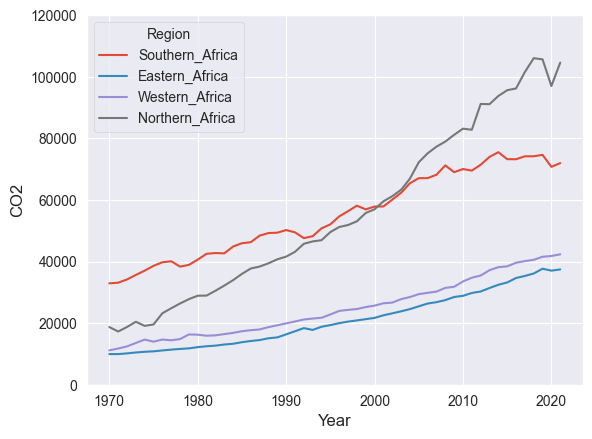

In [12]:
# Code
sns.set_style('darkgrid')

sns.lineplot(data=totals_by_country_africa, x="Year", y='CO2', hue='Region', errorbar=None)
plt.ylim(0, 120000)
plt.show()

## Instruction 3: Determine the relationship between time (`Year`) and `CO2` levels across the African regions


### Tasks

- Using the `totals_by_country_africa` dataset, conduct a Spearman's correlation to determine the relationship between time (`Year`) and `CO2` within each African `Region`.
- Save the results in a variable called `relationship_btw_time_CO2`.

In [14]:
# Code

relationship_btw_time_CO2 = totals_by_country_africa.groupby('Region').corr(method='spearman', numeric_only=True)
relationship_btw_time_CO2

Year       CO2
Region                                  
Eastern_Africa  Year  1.000000  0.181768
                CO2   0.181768  1.000000
Northern_Africa Year  1.000000  0.429875
                CO2   0.429875  1.000000
Southern_Africa Year  1.000000  0.260986
                CO2   0.260986  1.000000
Western_Africa  Year  1.000000  0.324071
                CO2   0.324071  1.000000

## Instruction 4: Determine if there is a significant difference in the CO2 levels among the African Regions

### Tasks

- Using `totals_by_country_africa`, conduct an ANOVA using `pingouin.anova()` on the `CO2` by `Region`. Save the results as `aov_results`.
- Conduct a posthoc test (with Bonferroni correction) using `pingouin.pairwise_tests()` to find the source of the significant difference. Save the results as `pw_ttest_result`.
- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? The previous task should provide you with the answer.

In [15]:
# Code
aov_results = pingouin.anova(data = totals_by_country_africa, dv='CO2', between='Region')
pw_ttest_result = pingouin.pairwise_tests(data = totals_by_country_africa, dv='CO2', between='Region', padjust='Bonferroni')

In [16]:
print(aov_results)
print('\n')
print(pw_ttest_result)

   Source  ddof1  ddof2          F         p-unc       np2
0  Region      3   2908  35.558065  1.455509e-22  0.035385


  Contrast                A                B  Paired  Parametric         T  \
0   Region   Eastern_Africa  Northern_Africa   False        True -9.435557   
1   Region   Eastern_Africa  Southern_Africa   False        True -6.814718   
2   Region   Eastern_Africa   Western_Africa   False        True -1.556846   
3   Region  Northern_Africa  Southern_Africa   False        True  0.080513   
4   Region  Northern_Africa   Western_Africa   False        True  7.588964   
5   Region  Southern_Africa   Western_Africa   False        True  5.720995   

           dof alternative         p-unc        p-corr    p-adjust       BF10  \
0   388.384101   two-sided  3.637966e-19  2.182780e-18  Bonferroni  1.554e+17   
1   641.441785   two-sided  2.180575e-11  1.308345e-10  Bonferroni  4.024e+08   
2  1917.149304   two-sided  1.196721e-01  7.180324e-01  Bonferroni      0.173   
3   881.0

## Instruction 5: Determine the most common (top 5) industries in each African region.

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Count the occurrences of each `Industry` within each `Region` and name it `Count`.
- Sort the data within each region group by `Count` in descending order
- Get the top 5 industries for each region
- save it to variable `top_5_industries` for each region.


In [17]:
# Code
Count = ipcc_2006_africa.groupby(by=["Region", "Industry"], as_index=False)["Industry"].size()
ipcc_sorted = Count.sort_values(["Region", "size"], ascending=(True, False))


top_5_industries = ipcc_sorted.groupby("Region", as_index=False).head(5)

#Renaming the "count" column to 'Count' in order to pass test
top_5_industries = top_5_industries.rename(columns={'size':'Count'})

In [18]:
top_5_industries.head()

,Region,Industry,Count
18,Eastern_Africa,Residential and other sectors,1454
9,Eastern_Africa,Manufacturing Industries and Construction,1383
8,Eastern_Africa,Main Activity Electricity and Heat Production,1174
19,Eastern_Africa,Road Transportation no resuspension,742
4,Eastern_Africa,Glass Production,728


## Instruction 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Calculate the average `CO2` emissions for each group.
- Find the `Industry` with the maximum average `CO2` emissions in each region.


In [19]:
# Code
grouped = ipcc_2006_africa.groupby(["Region", "Industry"], as_index=False)["CO2"].mean()
mean_co2_sorted = grouped.sort_values(["Region", "CO2"], ascending=(True, False))

#Selecting the top columns for each region
max_co2_industries = mean_co2_sorted.groupby("Region", as_index=False).head(1)

max_co2_industries

,Region,Industry,CO2
18,Eastern_Africa,Residential and other sectors,7904.439282
31,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
54,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
87,Western_Africa,Residential and other sectors,8702.936136


## Instruction 7: Predict the `CO2` levels (at each African region) in the year 2025

### Tasks

- Create an instance of `LinearRegression()` and save it as `reg`.
- Fit a linear model of `CO2` (in log base 10) by `Year` and `Region` using `reg.fit()`.
- Predict the values of `CO2` using the `reg.predict()` and the data provided. Save the result as `predicted_co2`. 
- Convert `predicted_co2` values from log base 10 to decimals and round to 2 d.p using `np.round()`.


In [28]:
# Code

newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata = pd.get_dummies(newdata)
newdata

,Year,Region_Eastern_Africa,Region_Northern_Africa,Region_Southern_Africa,Region_Western_Africa
0,2025,True,False,False,False
1,2025,False,False,False,True
2,2025,False,False,True,False
3,2025,False,True,False,False


In [21]:
totals_by_country_africa.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,1970,20393.274068
1,Eastern_Africa,BDI,Burundi,1970,4385.562636
2,Western_Africa,BEN,Benin,1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,1970,8158.106987
4,Southern_Africa,BWA,Botswana,1970,947.246888


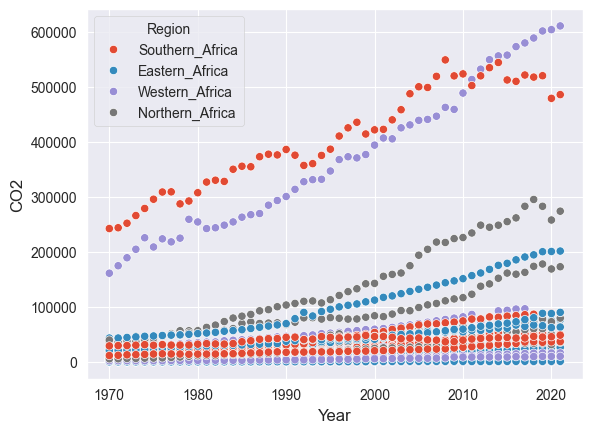

In [22]:
# Investigating relationship between "Year" and 'CO2'
sns.scatterplot(data=totals_by_country_africa, x="Year", y="CO2", hue="Region")
plt.show()

In [23]:
# Creating feature and target training sets
X_train = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])
y_train = np.log10(totals_by_country_africa['CO2'])

In [24]:
#Building model and predicting for year 2025
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted_co2 = reg.predict(newdata)
predicted_co2 = np.round(10 ** predicted_co2, 2)

In [25]:
display(predicted_co2)

array([15177.72, 10788.07, 37761.69, 41081.9 ])

## Instruction 8: Determine if CO2 levels affect annual temperature in the selected African countries

![relationship between co2 and temp](co2_temp.png)


### Tasks

- Select `Name`, `Year` and `CO2` of countries `countries`. Save the result as `selected_countries`.
- Convert `temperatures` dataset from wide to long format. Set the new column names to `Name` and `Temperature`. Save the result as `temp_long`.
- Perform an inner join between `selected_countries` and `temp_long` on `Name` and `Year`. Save the result as `joined`.
- Create a linear model of `Temperature` by `CO2` and `Name`. Save the result as `model_temp`. *The code has been added for you.*
- A one unit rise in log10 `CO2` leads to how many degrees rise in temperature?
- What is the adjusted R squared value of the model?


In [26]:
#Inspecting temperature dataframe
temperatures.head()

,Year,Ethiopia,Mozambique,Nigeria,Tunisia
0,1960,22.59,23.82,26.87,19.78
1,1961,22.30,24.00,26.28,19.67
2,1962,22.36,23.77,26.68,19.37
3,1963,22.56,23.27,27.02,19.33
4,1964,22.15,23.47,26.66,19.41


In [27]:
# Code
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

selected_countries = totals_by_country_africa[["Name", 'Year', 'CO2']].query('Name in @countries')

temp_long = temperatures.melt(id_vars="Year", value_name='Temperature', var_name='Name')

joined = pd.merge(selected_countries, temp_long, on=["Name", 'Year'], how='inner')


model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.22e-182
Time:                        02:21:42   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""